<a href="https://colab.research.google.com/github/KaVoshnik/College-works/blob/main/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colaboratory!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Mall_Customers_Segmentation.csv')
print(df.head(10))
print(list(df.dtypes))

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72
[dtype('int64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')]


In [28]:
df["Genre"].value_counts()

df["Genre"] = df["Genre"].astype('category')

df["Gender_code"] = df["Genre"].cat.codes
del df['Genre']

print(df)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_code
0             1   19                  15                      39            1
1             2   21                  15                      81            1
2             3   20                  16                       6            0
3             4   23                  16                      77            0
4             5   31                  17                      40            0
..          ...  ...                 ...                     ...          ...
195         196   35                 120                      79            0
196         197   45                 126                      28            0
197         198   32                 126                      74            1
198         199   32                 137                      18            1
199         200   30                 137                      83            1

[200 rows x 5 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

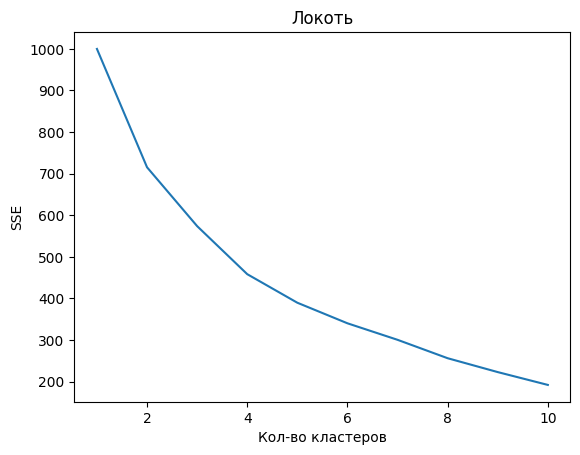

In [29]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, max_iter=1000)
  kmeans.fit(data_scaled)
  sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Локоть')
plt.xlabel('Кол-во кластеров')
plt.ylabel('SSE')
plt.show()

In [30]:
sorted_df = df.sort_values(by='Gender_code', ascending=False)

In [31]:
df_COOLMANS = sorted_df.iloc[0:88]
df_fem = sorted_df.iloc[88:200]

print(df_COOLMANS)

     CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_code
0             1   19                  15                      39            1
64           65   63                  48                      51            1
129         130   38                  71                      75            1
128         129   59                  71                      11            1
127         128   40                  71                      95            1
..          ...  ...                 ...                     ...          ...
60           61   70                  46                      56            1
59           60   53                  46                      46            1
55           56   47                  43                      41            1
57           58   69                  44                      46            1
61           62   19                  46                      55            1

[88 rows x 5 columns]


<Axes: >

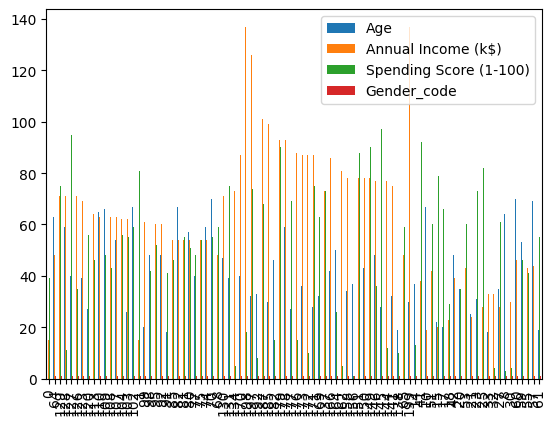

In [32]:
df_COOLMANS_predict = df_COOLMANS

del df_COOLMANS_predict['CustomerID']

df_COOLMANS_predict.plot.bar()

<Axes: >

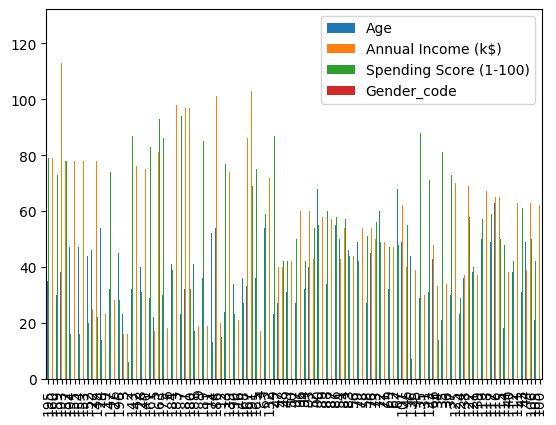

In [33]:
df_fem_predict = df_fem

del df_fem_predict['CustomerID']

df_fem_predict.plot.bar()

<Axes: >

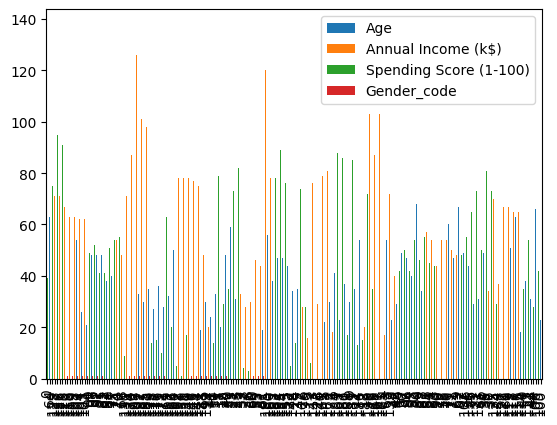

In [34]:
df_predict = sorted_df

del df_predict['CustomerID']

df_predict.plot.bar()

In [36]:
X = df

del X['Gender_code']
del X['CustomerID']

In [41]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

clusters = kmeans.labels_

df['kmeans_cluster'] = kmeans.labels_

print(f'Кластеры: {len(set(kmeans.labels_))}')

cluster_1 = df[df['kmeans_cluster'] == 0]
cluster_2 = df[df['kmeans_cluster'] == 1]
cluster_3 = df[df['kmeans_cluster'] == 2]
cluster_4 = df[df['kmeans_cluster'] == 3]
cluster_5 = df[df['kmeans_cluster'] == 4]

Кластеры: 5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [60]:
kmeans.labels_

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [51]:
print(cluster_1)

    Age  Annual Income (k$)  Spending Score (1-100)  kmeans_cluster
0    19                  15                      39               0
2    20                  16                       6               0
4    31                  17                      40               0
6    35                  18                       6               0
8    64                  19                       3               0
10   67                  19                      14               0
12   58                  20                      15               0
14   37                  20                      13               0
16   35                  21                      35               0
18   52                  23                      29               0
20   35                  24                      35               0
22   46                  25                       5               0
24   54                  28                      14               0
26   45                  28                     

In [52]:
print(cluster_2)

     Age  Annual Income (k$)  Spending Score (1-100)  kmeans_cluster
123   39                  69                      91               1
125   31                  70                      77               1
127   40                  71                      95               1
129   38                  71                      75               1
131   39                  71                      75               1
133   31                  72                      71               1
135   29                  73                      88               1
137   32                  73                      73               1
139   35                  74                      72               1
141   32                  75                      93               1
143   32                  76                      87               1
145   28                  77                      97               1
147   32                  77                      74               1
149   34                  78      

In [53]:
print(cluster_3)

     Age  Annual Income (k$)  Spending Score (1-100)  kmeans_cluster
124   23                  70                      29               2
128   59                  71                      11               2
130   47                  71                       9               2
132   25                  72                      34               2
134   20                  73                       5               2
136   44                  73                       7               2
138   19                  74                      10               2
140   57                  75                       5               2
142   28                  76                      40               2
144   25                  77                      12               2
146   48                  77                      36               2
148   34                  78                      22               2
150   43                  78                      17               2
152   44                  78      

In [54]:
print(cluster_4)

     Age  Annual Income (k$)  Spending Score (1-100)  kmeans_cluster
43    31                  39                      61               3
46    50                  40                      55               3
47    27                  40                      47               3
48    29                  40                      42               3
49    31                  40                      42               3
..   ...                 ...                     ...             ...
119   50                  67                      57               3
120   27                  67                      56               3
121   38                  67                      40               3
122   40                  69                      58               3
126   43                  71                      35               3

[79 rows x 4 columns]


In [55]:
print(cluster_5)

    Age  Annual Income (k$)  Spending Score (1-100)  kmeans_cluster
1    21                  15                      81               4
3    23                  16                      77               4
5    22                  17                      76               4
7    23                  18                      94               4
9    30                  19                      72               4
11   35                  19                      99               4
13   24                  20                      77               4
15   22                  20                      79               4
17   20                  21                      66               4
19   35                  23                      98               4
21   25                  24                      73               4
23   31                  25                      73               4
25   29                  28                      82               4
27   35                  28                     

In [56]:
clust_1 = cluster_1.describe()
clust_2 = cluster_2.describe()
clust_3 = cluster_3.describe()
clust_4 = cluster_4.describe()
clust_5 = cluster_5.describe()

print("--------")
print(clust_1)
print("--------")
print(clust_2)
print("--------")
print(clust_3)
print("--------")
print(clust_4)
print("--------")
print(clust_5)

--------
             Age  Annual Income (k$)  Spending Score (1-100)  kmeans_cluster
count  23.000000           23.000000               23.000000            23.0
mean   45.217391           26.304348               20.913043             0.0
std    13.228607            7.893811               13.017167             0.0
min    19.000000           15.000000                3.000000             0.0
25%    35.500000           19.500000                9.500000             0.0
50%    46.000000           25.000000               17.000000             0.0
75%    53.500000           33.000000               33.500000             0.0
max    67.000000           39.000000               40.000000             0.0
--------
             Age  Annual Income (k$)  Spending Score (1-100)  kmeans_cluster
count  39.000000           39.000000               39.000000            39.0
mean   32.692308           86.538462               82.128205             1.0
std     3.728650           16.312485                9.3644

In [59]:
kmeans.predict([[22.0, 22.0, 22.0, 1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)